In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import os


In [2]:
df = pd.read_csv('S4248SM144NCEN.csv', index_col= 'DATE', parse_dates=True)
df.index.freq = 'MS'

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 344 entries, 1992-01-01 to 2020-08-01
Freq: MS
Data columns (total 1 columns):
S4248SM144NCEN    344 non-null int64
dtypes: int64(1)
memory usage: 5.4 KB


In [4]:
df.columns= ['Sales']

In [5]:
df.head()

,Sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


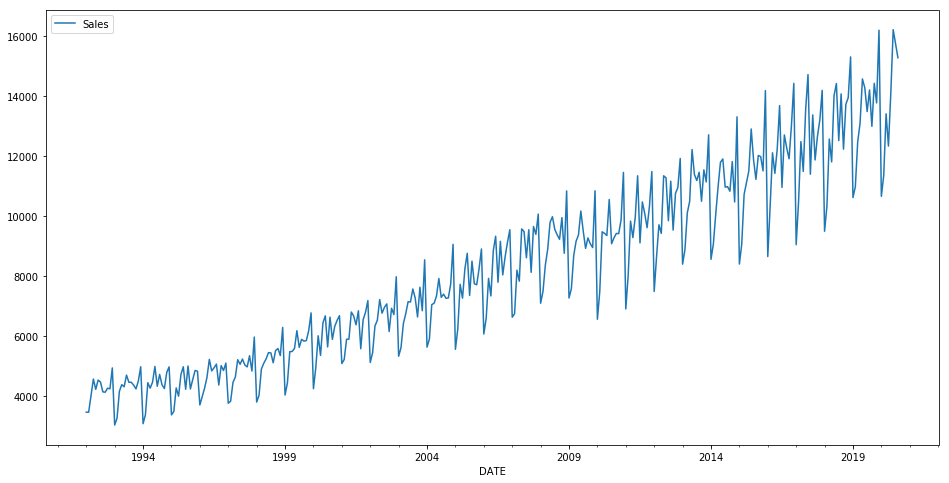

In [6]:
df.plot(figsize=(16,8))

In [14]:
!pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

DEPRECATION: Python 3.5 reached the end of its life on September 13th, 2020. Please upgrade your Python as Python 3.5 is no longer maintained. pip 21.0 will drop support for Python 3.5 in January 2021. pip 21.0 will remove support for this functionality.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 8.6 MB 6.0 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [15]:
result= seasonal_decompose(df['Sales'])

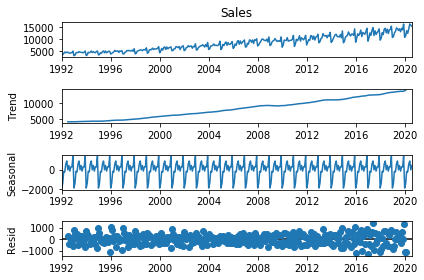

In [16]:
result.plot();

In [17]:
len(df)

344

In [47]:
train = df.iloc[:326]
test= df.iloc[326:]
print(test)

            Sales
DATE             
2019-03-01  12472
2019-04-01  13098
2019-05-01  14573
2019-06-01  14277
2019-07-01  13484
2019-08-01  14205
2019-09-01  12992
2019-10-01  14427
2019-11-01  13773
2019-12-01  16197
2020-01-01  10659
2020-02-01  11350
2020-03-01  13410
2020-04-01  12334
2020-05-01  14111
2020-06-01  16215
2020-07-01  15757
2020-08-01  15280


In [48]:
test= test[0:12]
print(test)

            Sales
DATE             
2019-03-01  12472
2019-04-01  13098
2019-05-01  14573
2019-06-01  14277
2019-07-01  13484
2019-08-01  14205
2019-09-01  12992
2019-10-01  14427
2019-11-01  13773
2019-12-01  16197
2020-01-01  10659
2020-02-01  11350


In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2019-03-01 to 2020-02-01
Freq: MS
Data columns (total 1 columns):
Sales    12 non-null int64
dtypes: int64(1)
memory usage: 192.0 bytes


In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [24]:
scaled_train = scaler.transform(train)

In [25]:
scaled_test = scaler.transform(test) 

In [26]:
from keras.preprocessing.sequence import TimeseriesGenerator

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarn

In [27]:
len(scaled_train)

326



Now, we will start to create LSTM model for forecasting.


In [28]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [29]:
n_input = 12
n_feature = 1

train_generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_input, batch_size=1)

In [30]:
model = Sequential()

model.add(LSTM(128,activation = 'relu', input_shape= (n_input, n_feature), return_sequences=True))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(LSTM(128, activation='relu', return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 12, 128)           66560     
_________________________________________________________________
lstm_2 (LSTM)                (None, 12, 128)           131584    
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 329,857
Trainable params: 329,857
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit_generator(train_generator,epochs= 50)

Epoch 1/50
314/314 [==============================] - 11s 34ms/step - loss: 0.0203
Epoch 2/50
314/314 [==============================] - 9s 30ms/step - loss: 0.0115
Epoch 3/50
314/314 [==============================] - 8s 27ms/step - loss: 0.0088
Epoch 4/50
314/314 [==============================] - 9s 29ms/step - loss: 0.0081
Epoch 5/50
314/314 [==============================] - 9s 28ms/step - loss: 0.0072
Epoch 6/50
314/314 [==============================] - 9s 28ms/step - loss: 0.0058
Epoch 7/50
314/314 [==============================] - 9s 28ms/step - loss: 0.0042
Epoch 8/50
314/314 [==============================] - 10s 32ms/step - loss: 0.0037
Epoch 9/50
314/314 [==============================] - 10s 31ms/step - loss: 0.0028
Epoch 10/50
314/314 [==============================] - 9s 30ms/step - loss: 0.0028
Epoch 11/50
314/314 [==============================] - 9s 30ms/step - loss: 0.0024
Epoch 12/50
314/314 [==============================] - 9s 29ms/step - loss: 0.0020
Epoch 13/5

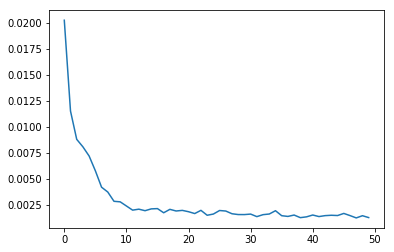

In [33]:
my_loss= model.history.history['loss']
plt.plot(range(len(my_loss)),my_loss)

In [34]:
# consider last 12 items for predictions
first_eval_batch = scaled_train[-12:]

In [35]:
first_eval_batch

array([[0.77689989],
       [0.71466971],
       [0.89443675],
       [0.92766963],
       [0.77274578],
       [0.89940539],
       [0.74936874],
       [0.87122261],
       [0.8893052 ],
       [1.        ],
       [0.61782194],
       [0.64714507]])

In [49]:
first_eval_batch = first_eval_batch.reshape((1,n_input,n_feature))
print(first_eval_batch)

[[[0.77689989]
  [0.71466971]
  [0.89443675]
  [0.92766963]
  [0.77274578]
  [0.89940539]
  [0.74936874]
  [0.87122261]
  [0.8893052 ]
  [1.        ]
  [0.61782194]
  [0.64714507]]]


In [37]:
model.predict(first_eval_batch)

array([[0.8447012]], dtype=float32)

Forecast Using RNN Model

In [38]:
#holding my predictions
test_predictions = []


# last n_input points from the training set
first_eval_batch = scaled_train[-n_input:]
# reshape this to the format RNN wants (same format as TimeseriesGeneration)
current_batch = first_eval_batch.reshape((1,n_input,n_feature))

#how far into the future will I forecast?

for i in range(len(test)):
    
    # One timestep ahead of historical 12 points
    current_pred = model.predict(current_batch)[0]
    
    #store that prediction
    test_predictions.append(current_pred)
    
    # UPDATE current batch o include prediction
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis= 1)

In [39]:
test_predictions

[array([0.8447012], dtype=float32),
 array([0.8096907], dtype=float32),
 array([0.95446914], dtype=float32),
 array([0.9712146], dtype=float32),
 array([0.8705161], dtype=float32),
 array([0.95164883], dtype=float32),
 array([0.84160185], dtype=float32),
 array([0.9370074], dtype=float32),
 array([0.9587227], dtype=float32),
 array([1.0152339], dtype=float32),
 array([0.6777718], dtype=float32),
 array([0.7378939], dtype=float32)]

In [40]:
true_predictions = scaler.inverse_transform(test_predictions)

In [41]:
true_predictions

array([[13401.3962754 ],
       [12971.57289433],
       [14749.01768512],
       [14954.60155159],
       [13718.32642227],
       [14714.3927027 ],
       [13363.34589529],
       [14534.64018393],
       [14801.23871815],
       [15495.02627504],
       [11352.00447106],
       [12090.12315756]])

In [42]:
test['Predictions'] =true_predictions

In [43]:
test.head()

,Sales,Predictions
DATE,,
2019-03-01,12472,13401.396275
2019-04-01,13098,12971.572894
2019-05-01,14573,14749.017685
2019-06-01,14277,14954.601552
2019-07-01,13484,13718.326422


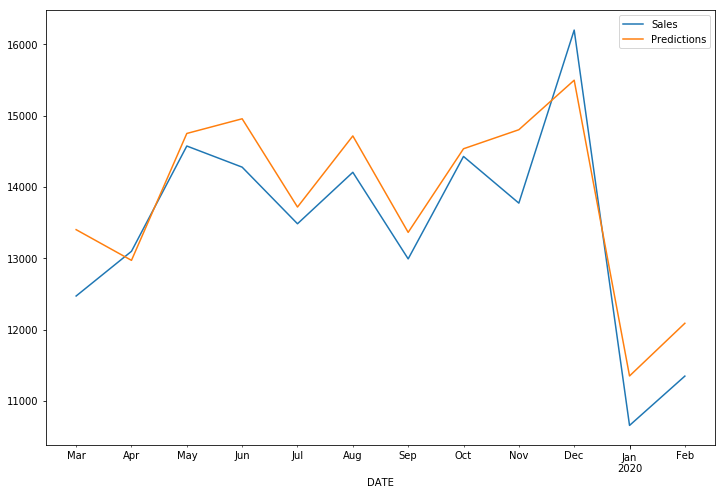

In [44]:
test.plot(figsize=(12,8))

In [50]:
model.save('mycoolmodel.h5')


We consider last 12 items items from the data for predictions. We predict the sell on last 12 items. We compare it as actual sale vs true prediction.

Model is not bad.